# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.
 - Changing the contents of the evaluation block at the end of the notebook.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [4]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.

import pandas as pd
import zipfile
import os
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [5]:
import pandas as pd
import zipfile

# Define the path to your zip file
zip_file_path = '/content/csv.zip'

# Create an empty list to store DataFrames
dfs = []

# Open the zip file and read each CSV into a DataFrame
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        # Ignore system files like _MACOSX or .DS_Store
        if file_name.endswith('.csv') and not file_name.startswith('__MACOSX/'):
            with zip_ref.open(file_name) as f:
                try:
                    # Try reading with UTF-8 encoding
                    df = pd.read_csv(f, encoding='utf-8')
                except (UnicodeDecodeError, pd.errors.EmptyDataError):
                    try:
                        # Fallback to ISO-8859-1 encoding if UTF-8 fails
                        df = pd.read_csv(f, encoding='ISO-8859-1')
                    except pd.errors.EmptyDataError:
                        # Skip if the file is empty or has no parsable columns
                        continue
                dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Function to fix specific character encoding issues
def fix_encoding_issues(text):
    replacements = {
        "â€™": "’",  # Correct typographic apostrophe
        "â€œ": "“", "â€�": "”",  # Correct opening and closing quotation marks
        "â€˜": "‘", "â€": "”",  # Fix other quotation issues
        "Ã©": "é",  # Correct accented e
        "Ã": "à",  # Correct accented a
        "â€¦": "…"  # Correct ellipsis
    }
    for corrupted, correct in replacements.items():
        text = text.replace(corrupted, correct)
    return text

# Apply the fix function to the 'Title' and 'Lyric' columns
df['Title'] = df['Title'].apply(lambda x: fix_encoding_issues(str(x)))
df['Lyric'] = df['Lyric'].apply(lambda x: fix_encoding_issues(str(x)))

# Check the first few rows to verify
#print(df.head())
print("Number of records:", len(df))


Number of records: 6027


In [6]:
df.head()

Unnamed: 0    Artist                  Title             Album    Year  \
0         0.0  Dua Lipa              New Rules          Dua Lipa  2017.0   
1         1.0  Dua Lipa        Don’t Start Now  Future Nostalgia  2019.0   
2         2.0  Dua Lipa                  IDGAF          Dua Lipa  2017.0   
3         3.0  Dua Lipa  Blow Your Mind (Mwah)          Dua Lipa  2016.0   
4         4.0  Dua Lipa             Be the One          Dua Lipa  2015.0   

         Date                                              Lyric  
0  2017-06-02  one one one one one   talkin' in my sleep at n...  
1  2019-11-01  if you don't wanna see me   did a full 80 craz...  
2  2017-06-02  you call me all friendly tellin' me how much y...  
3  2016-08-26  i know it's hot i know we've got something tha...  
4  2015-10-30  i see the moon i see the moon i see the moon o...

In [7]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [8]:
# Display the original length of the DataFrame
print("Original number of records:", len(df))

# Step 1: Remove rows where the 'Lyric' is empty or contains only whitespace
df = df[df['Lyric'].str.strip().astype(bool)]

# Step 2: Remove duplicate lyrics if they exist
df = df.drop_duplicates(subset=['Lyric'], ignore_index=True)

# Step 3: Display the updated length of the DataFrame to see the change after cleaning
print("Number of records after cleaning:", len(df))

# Display the first few rows to verify the cleaning
print(df.head())


Original number of records: 6027
Number of records after cleaning: 5641
   Unnamed: 0    Artist                  Title             Album    Year  \
0         0.0  Dua Lipa              New Rules          Dua Lipa  2017.0   
1         1.0  Dua Lipa        Don’t Start Now  Future Nostalgia  2019.0   
2         2.0  Dua Lipa                  IDGAF          Dua Lipa  2017.0   
3         3.0  Dua Lipa  Blow Your Mind (Mwah)          Dua Lipa  2016.0   
4         4.0  Dua Lipa             Be the One          Dua Lipa  2015.0   

         Date                                              Lyric  
0  2017-06-02  one one one one one   talkin' in my sleep at n...  
1  2019-11-01  if you don't wanna see me   did a full 80 craz...  
2  2017-06-02  you call me all friendly tellin' me how much y...  
3  2016-08-26  i know it's hot i know we've got something tha...  
4  2015-10-30  i see the moon i see the moon i see the moon o...  


### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

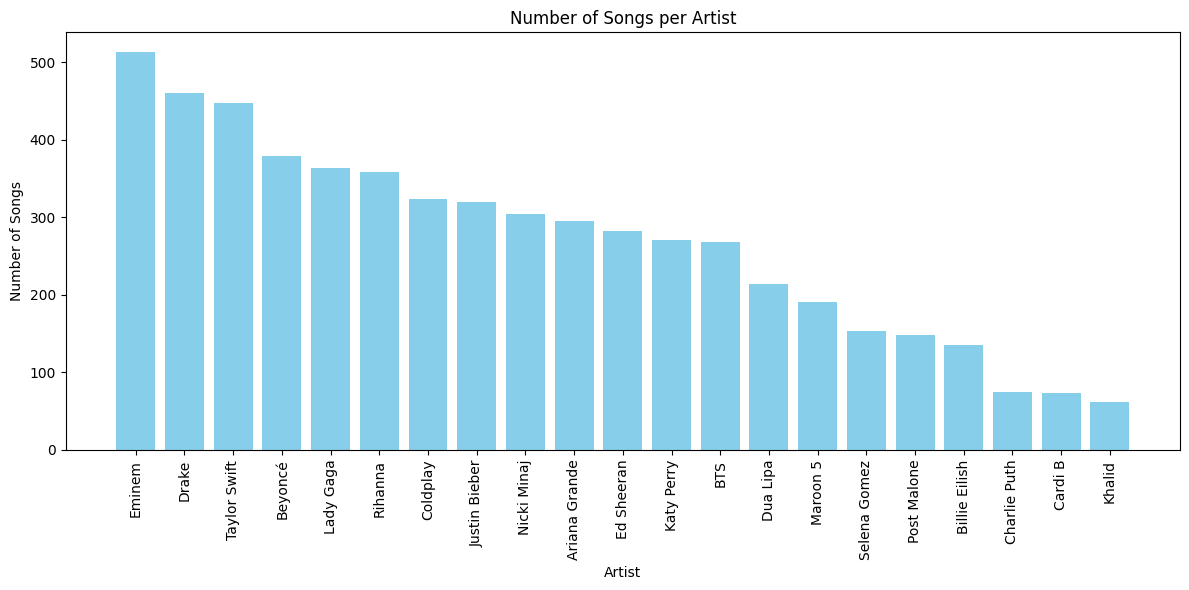

In [9]:
import matplotlib.pyplot as plt
import re
import warnings

# Set default font family to 'DejaVu Sans' to avoid missing font issues
plt.rcParams['font.family'] = 'DejaVu Sans'

# Suppress all warnings related to matplotlib font manager
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

# Clean artist names: remove parentheses and their contents only if they exist
df['Artist'] = df['Artist'].apply(lambda x: re.sub(r'\s*\(.*?\)\s*', '', str(x)))

# Count the number of songs/lyrics per artist
artist_counts = df['Artist'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(artist_counts.index, artist_counts.values, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per Artist')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_data(data):
    # Define a function to preprocess each lyric
    def clean_lyric(text):
        # Check if the text is a string, if not, convert to an empty string
        if not isinstance(text, str):
            return ""

        # Convert text to lowercase
        text = text.lower()
        # Remove non-ASCII characters to eliminate special symbols
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        # Remove punctuation and special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove stopwords and apply lemmatization
        words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
        # Join words back into a single string
        return ' '.join(words)


    # Apply the cleaning function to the 'Lyric' column
    data['Lyric'] = data['Lyric'].apply(clean_lyric)

    return data

# Apply the preprocessing function to the DataFrame
df = preprocess_data(df)

# Display the first few rows of the DataFrame to verify preprocessing
print(df.head())


   Unnamed: 0    Artist                  Title             Album    Year  \
0         0.0  Dua Lipa              New Rules          Dua Lipa  2017.0   
1         1.0  Dua Lipa        Don’t Start Now  Future Nostalgia  2019.0   
2         2.0  Dua Lipa                  IDGAF          Dua Lipa  2017.0   
3         3.0  Dua Lipa  Blow Your Mind (Mwah)          Dua Lipa  2016.0   
4         4.0  Dua Lipa             Be the One          Dua Lipa  2015.0   

         Date                                              Lyric  
0  2017-06-02  one one one one one talkin sleep night makin c...  
1  2019-11-01  dont wanna see full crazy thinking bout way he...  
2  2017-06-02  call friendly tellin much miss thats funny gue...  
3  2016-08-26  know hot know weve got something money cant bu...  
4  2015-10-30  see moon see moon see moon oh youre looking su...  


In [13]:
"""
# Define the preprocessing function with normalization for apostrophe variants
def preprocess_lyrics(text):
    # Normalize different apostrophe variants to standard single quote
    text = re.sub(r"[’‘‛]", "'", text)

    # Convert to lowercase
    text = text.lower()

    # Expand common contractions, including variations of "it's" and "its"
    contractions = {
        r"(\w+)in'": r"\1ing",
        r"\bwe've\b": "we have",
        r"\bit's\b": "it is",
        r"\bdont\b": "don't",
        r"\bdon't\b": "do not",
        r"\bwanna\b": "want to",
        r"\bgonna\b": "going to",
        r"\bgotta\b": "got to",
        r"\bcant\b": "can't",
        r"\bcan't\b": "cannot",
        r"\bive\b": "i've",
        r"\bi've\b": "i have",
        r"\bim\b": "i'm",
        r"\bi'm\b": "i am",
        r"\byoure\b": "you're",
        r"\byou're\b": "you are",
        r"\bthey're\b": "they are",
        r"\bhes\b": "he's",
        r"\bshes\b": "she's",
        r"\bisnt\b": "isn't",
        r"\bhe's\b": "he is",
        r"\bshes\b": "she's",
        r"\bshe's\b": "she is",
        r"\bisn't\b": "is not",
        r"\baren't\b": "are not",
        r"\bisnt\b": "isn't",
        r"\barent\b": "aren't",
        r"\bdoesnt\b": "doesn't",
        r"\bdoesn't\b": "does not",
        r"\bdidnt\b": "didn't",
        r"\bdidn't\b": "did not",
        r"\bhasnt\b": "hasn't",
        r"\bhavent\b": "haven't",
        r"\bhasn't\b": "has not",
        r"\bhaven't\b": "have not",
    }
    # Replace contractions using regex patterns for exact matches
    for contraction, expanded in contractions.items():
        text = re.sub(contraction, expanded, text)

    # Remove punctuation, but keep apostrophes
    text = text.translate(str.maketrans('', '', string.punctuation.replace("'", "")))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the preprocessing function to the 'Lyric' column
df['Lyric'] = df['Lyric'].apply(preprocess_lyrics)

# Check the first few rows to verify the preprocessing
print(df['Lyric'].head(25))
"""

'\n# Define the preprocessing function with normalization for apostrophe variants\ndef preprocess_lyrics(text):\n    # Normalize different apostrophe variants to standard single quote\n    text = re.sub(r"[’‘‛]", "\'", text)\n\n    # Convert to lowercase\n    text = text.lower()\n\n    # Expand common contractions, including variations of "it\'s" and "its"\n    contractions = {\n        r"(\\w+)in\'": r"\x01ing",\n        r"\x08we\'ve\x08": "we have",\n        r"\x08it\'s\x08": "it is",\n        r"\x08dont\x08": "don\'t",\n        r"\x08don\'t\x08": "do not",\n        r"\x08wanna\x08": "want to",\n        r"\x08gonna\x08": "going to",\n        r"\x08gotta\x08": "got to",\n        r"\x08cant\x08": "can\'t",\n        r"\x08can\'t\x08": "cannot",\n        r"\x08ive\x08": "i\'ve",\n        r"\x08i\'ve\x08": "i have",\n        r"\x08im\x08": "i\'m",\n        r"\x08i\'m\x08": "i am",\n        r"\x08youre\x08": "you\'re",\n        r"\x08you\'re\x08": "you are",\n        r"\x08they\'re\x08": "

#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [14]:
from sklearn.model_selection import train_test_split

# Separate features (lyrics) and labels (artists)
X = df['Lyric']  # Features
y = df['Artist']  # Labels

# First split: Train and remaining (30% for dev + test)
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Second split: Dev and test (split remaining 30% into two 15% parts)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.50, random_state=42, stratify=y_remaining
)

# Print the sizes of each split
print("Training set size:", len(X_train))
print("Development (Dev) set size:", len(X_dev))
print("Test set size:", len(X_test))


Training set size: 3948
Development (Dev) set size: 846
Test set size: 847


### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [15]:
import numpy as np
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.priors = {}
        self.likelihoods = defaultdict(lambda: defaultdict(lambda: 0))
        self.vocabulary = set()
        self.class_counts = defaultdict(lambda: 0)
        self.word_counts = defaultdict(lambda: defaultdict(lambda: 0))
        self.total_words = defaultdict(lambda: 0)

    def fit(self, X, y):
        """
        Train the Naive Bayes classifier.

        X : list of str
            List of lyrics (each lyric is a preprocessed string of words).
        y : list of str
            List of artists (class labels) for each lyric.
        """
        # Calculate priors and collect word counts
        for text, label in zip(X, y):
            self.class_counts[label] += 1
            words = text.split()
            for word in words:
                self.word_counts[label][word] += 1
                self.total_words[label] += 1
                self.vocabulary.add(word)

        # Calculate priors
        total_samples = len(y)
        for label in self.class_counts:
            self.priors[label] = self.class_counts[label] / total_samples

        # Calculate likelihoods with Laplace smoothing
        vocab_size = len(self.vocabulary)
        for label in self.class_counts:
            for word in self.vocabulary:
                self.likelihoods[label][word] = (
                    self.word_counts[label][word] + 1
                ) / (self.total_words[label] + vocab_size)

    def predict(self, X):
        """
        Predict the class labels for the given input data.

        X : list of str
            List of lyrics (each lyric is a preprocessed string of words).

        Returns
        -------
        predictions : list of str
            Predicted artist (class) for each lyric.
        """
        predictions = []
        for text in X:
            words = text.split()
            class_scores = {}
            for label in self.class_counts:
                # Start with the log of the prior probability
                class_scores[label] = np.log(self.priors[label])
                for word in words:
                    # Add the log of the likelihood of each word
                    if word in self.vocabulary:
                        class_scores[label] += np.log(self.likelihoods[label][word])

            # Predict the label with the highest score
            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

    def score(self, X, y):
        """
        Calculate accuracy of the classifier.

        X : list of str
            List of lyrics (each lyric is a preprocessed string of words).
        y : list of str
            True artist labels for each lyric.

        Returns
        -------
        accuracy : float
            Classification accuracy on the provided data.
        """
        predictions = self.predict(X)
        correct = sum(1 for pred, true in zip(predictions, y) if pred == true)
        return correct / len(y)

# Usage Example
# Assuming df has 'Lyric' and 'Artist' columns
# Split data into train/dev/test sets (70/15/15) with a fixed random_state
from sklearn.model_selection import train_test_split

# First split: 70% training, 30% remaining (for dev + test)
train_lyrics, remaining_lyrics, train_artists, remaining_artists = train_test_split(
    df['Lyric'], df['Artist'], test_size=0.3, random_state=42
)

# Second split: 15% dev, 15% test from the remaining 30%
dev_lyrics, test_lyrics, dev_artists, test_artists = train_test_split(
    remaining_lyrics, remaining_artists, test_size=0.5, random_state=42
)


# Convert to list format
train_lyrics_bow = train_lyrics.tolist()
dev_lyrics_bow = dev_lyrics.tolist()
test_lyrics_bow = test_lyrics.tolist()

# Train Naive Bayes Classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(train_lyrics_bow, train_artists.tolist())

# Evaluate on dev set
nb_dev_accuracy = nb_classifier.score(dev_lyrics_bow, dev_artists.tolist())
print(f"Naive Bayes Dev Set Accuracy: {nb_dev_accuracy * 100:.2f}%")


Naive Bayes Dev Set Accuracy: 61.11%


### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
train_tfidf = tfidf.fit_transform(train_lyrics)
dev_tfidf = tfidf.transform(dev_lyrics)
test_tfidf = tfidf.transform(test_lyrics)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(train_tfidf, train_artists)
lr_dev_accuracy = lr.score(dev_tfidf, dev_artists)
print(f"Logistic Regression Dev Set Accuracy: {lr_dev_accuracy * 100:.2f}%")

# Predict and evaluate Logistic Regression on test set
lr_test_predictions = lr.predict(test_tfidf)
print("Logistic Regression Classification Report:\n", classification_report(test_artists, lr_test_predictions))

# SVM Classifier
svm = SVC(random_state=42)
svm.fit(train_tfidf, train_artists)
svm_dev_accuracy = svm.score(dev_tfidf, dev_artists)
print(f"SVM Dev Set Accuracy: {svm_dev_accuracy * 100:.2f}%")

# Predict and evaluate SVM on test set
svm_test_predictions = svm.predict(test_tfidf)
print("SVM Classification Report:\n", classification_report(test_artists, svm_test_predictions))


Logistic Regression Dev Set Accuracy: 66.31%
Logistic Regression Classification Report:
                precision    recall  f1-score   support

Ariana Grande       0.67      0.56      0.61        52
          BTS       0.86      0.71      0.78        42
      Beyoncé       0.52      0.74      0.61        43
Billie Eilish       1.00      0.46      0.63        28
      Cardi B       1.00      0.25      0.40        16
 Charlie Puth       1.00      0.10      0.18        10
     Coldplay       0.55      0.84      0.67        45
        Drake       0.76      0.90      0.82        69
     Dua Lipa       0.85      0.50      0.63        34
   Ed Sheeran       0.67      0.50      0.57        44
       Eminem       0.80      0.90      0.85        68
Justin Bieber       0.62      0.60      0.61        52
   Katy Perry       0.78      0.47      0.59        38
       Khalid       0.50      0.12      0.20         8
    Lady Gaga       0.58      0.67      0.62        57
     Maroon 5       1.00      

### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.


Model: Naive Bayes
Development Set - Accuracy: 0.61, F1 Score: 0.60
Test Set - Accuracy: 0.58, F1 Score: 0.57
Confusion Matrix (Test Set):
[[24  0  4  0  0  0  0  5  0  1  3  1  0  0  0  0  1  0  6  0  7]
 [ 0 30  3  0  0  0  0  1  0  0  2  1  0  0  0  0  1  0  2  0  2]
 [ 0  0 31  0  0  0  0  5  2  0  0  2  0  0  0  0  0  0  1  0  2]
 [ 1  0  2  6  0  0  0  2  0  0  1  2  0  1  1  0  0  0  0  0 12]
 [ 0  0  0  0  3  0  0  4  0  0  2  0  0  0  0  0  6  0  1  0  0]
 [ 0  0  1  0  0  1  0  1  0  0  0  3  0  0  0  0  0  0  1  0  3]
 [ 0  1  2  0  0  0 16  0  0  4  2  1  1  0  0  0  0  0  2  0 16]
 [ 0  0  1  0  0  0  0 62  0  0  1  0  0  0  0  0  0  0  1  0  4]
 [ 1  0  2  0  0  0  0  0 18  2  1  2  0  0  1  0  0  0  4  0  3]
 [ 0  0  0  0  0  0  0  2  0 21  3  0  0  0  1  0  0  0  1  0 16]
 [ 0  0  0  0  0  0  0  0  0  1 64  1  0  0  0  0  1  0  0  0  1]
 [ 3  0  3  0  0  0  0  7  0  0  2 28  0  0  0  0  0  0  4  0  5]
 [ 0  0  3  0  0  0  1  2  1  1  0  1 14  0  1  0  0  0  0  0 14]
 [

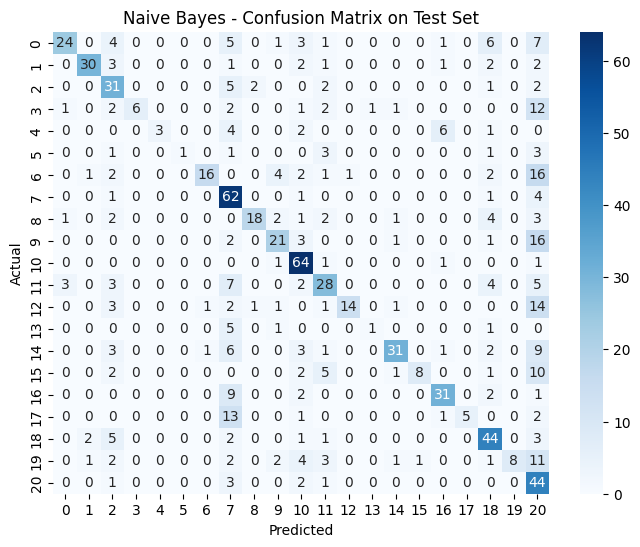

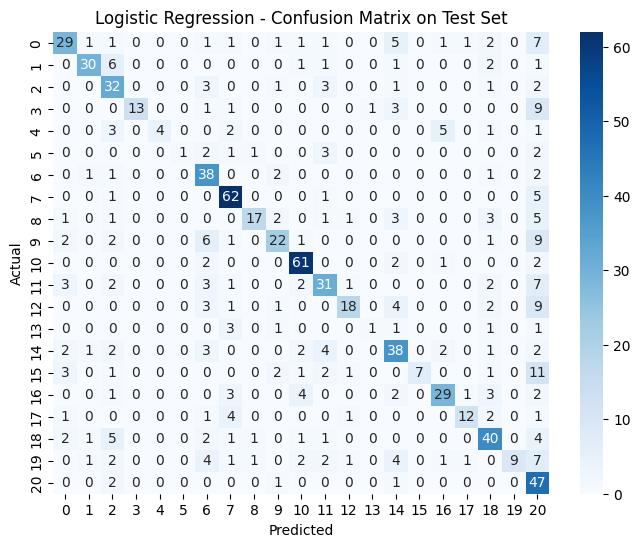

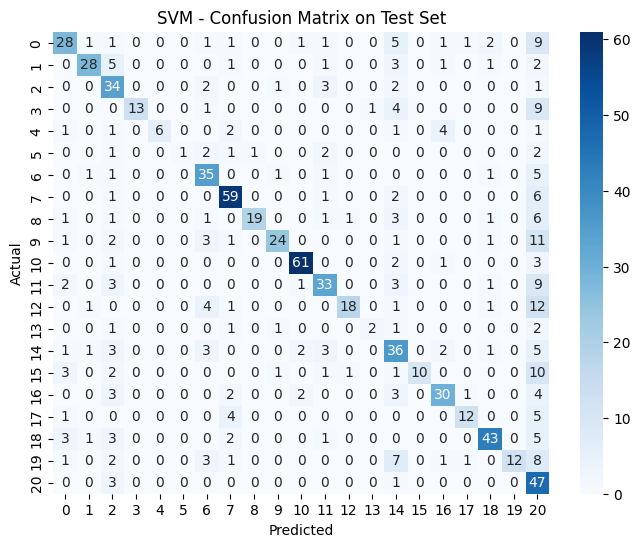

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into train/dev/test sets (70/15/15)
from sklearn.model_selection import train_test_split

# First split: 70% training, 30% remaining (for dev + test)
train_lyrics, remaining_lyrics, train_artists, remaining_artists = train_test_split(
    df['Lyric'], df['Artist'], test_size=0.3, random_state=42
)

# Second split: 15% dev, 15% test from the remaining 30%
dev_lyrics, test_lyrics, dev_artists, test_artists = train_test_split(
    remaining_lyrics, remaining_artists, test_size=0.5, random_state=42
)


# Convert to list format
train_lyrics = train_lyrics.tolist()
dev_lyrics = dev_lyrics.tolist()
test_lyrics = test_lyrics.tolist()

# Use TF-IDF for feature extraction
tfidf = TfidfVectorizer(max_features=5000)
train_tfidf = tfidf.fit_transform(train_lyrics)
dev_tfidf = tfidf.transform(dev_lyrics)
test_tfidf = tfidf.transform(test_lyrics)

# Dictionary to store evaluation results for each model
evaluation_results = {}

# 1. Naive Bayes (from scratch)

# Initialize and train the Naive Bayes classifier from scratch
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(train_lyrics, train_artists)

# Evaluate on dev set
nb_dev_predictions = nb_classifier.predict(dev_lyrics)
nb_dev_accuracy = accuracy_score(dev_artists, nb_dev_predictions)
nb_dev_f1 = f1_score(dev_artists, nb_dev_predictions, average="weighted")

# Test set evaluation
nb_test_predictions = nb_classifier.predict(test_lyrics)
nb_test_accuracy = accuracy_score(test_artists, nb_test_predictions)
nb_test_f1 = f1_score(test_artists, nb_test_predictions, average="weighted")
nb_test_conf_matrix = confusion_matrix(test_artists, nb_test_predictions)

# Store results
evaluation_results["Naive Bayes"] = {
    "Dev Accuracy": nb_dev_accuracy,
    "Dev F1": nb_dev_f1,
    "Test Accuracy": nb_test_accuracy,
    "Test F1": nb_test_f1,
    "Confusion Matrix": nb_test_conf_matrix
}

# 2. Logistic Regression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(train_tfidf, train_artists)

# Evaluate on dev set
lr_dev_predictions = lr.predict(dev_tfidf)
lr_dev_accuracy = accuracy_score(dev_artists, lr_dev_predictions)
lr_dev_f1 = f1_score(dev_artists, lr_dev_predictions, average="weighted")

# Test set evaluation
lr_test_predictions = lr.predict(test_tfidf)
lr_test_accuracy = accuracy_score(test_artists, lr_test_predictions)
lr_test_f1 = f1_score(test_artists, lr_test_predictions, average="weighted")
lr_test_conf_matrix = confusion_matrix(test_artists, lr_test_predictions)

# Store results
evaluation_results["Logistic Regression"] = {
    "Dev Accuracy": lr_dev_accuracy,
    "Dev F1": lr_dev_f1,
    "Test Accuracy": lr_test_accuracy,
    "Test F1": lr_test_f1,
    "Confusion Matrix": lr_test_conf_matrix
}

# 3. Support Vector Machine (SVM)

svm = SVC(random_state=42)
svm.fit(train_tfidf, train_artists)

# Evaluate on dev set
svm_dev_predictions = svm.predict(dev_tfidf)
svm_dev_accuracy = accuracy_score(dev_artists, svm_dev_predictions)
svm_dev_f1 = f1_score(dev_artists, svm_dev_predictions, average="weighted")

# Test set evaluation
svm_test_predictions = svm.predict(test_tfidf)
svm_test_accuracy = accuracy_score(test_artists, svm_test_predictions)
svm_test_f1 = f1_score(test_artists, svm_test_predictions, average="weighted")
svm_test_conf_matrix = confusion_matrix(test_artists, svm_test_predictions)

# Store results
evaluation_results["SVM"] = {
    "Dev Accuracy": svm_dev_accuracy,
    "Dev F1": svm_dev_f1,
    "Test Accuracy": svm_test_accuracy,
    "Test F1": svm_test_f1,
    "Confusion Matrix": svm_test_conf_matrix
}

# Display evaluation results
for model_name, results in evaluation_results.items():
    print(f"\nModel: {model_name}")
    print(f"Development Set - Accuracy: {results['Dev Accuracy']:.2f}, F1 Score: {results['Dev F1']:.2f}")
    print(f"Test Set - Accuracy: {results['Test Accuracy']:.2f}, F1 Score: {results['Test F1']:.2f}")
    print("Confusion Matrix (Test Set):")
    print(results["Confusion Matrix"])

# Plot confusion matrices for each model
for model_name, results in evaluation_results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(results["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix on Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [18]:
# Summary of Model Performance
print("\n=== Model Performance Summary ===\n")
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"  Development Set - Accuracy: {results['Dev Accuracy']:.2f}, F1 Score: {results['Dev F1']:.2f}")
    print(f"  Test Set - Accuracy: {results['Test Accuracy']:.2f}, F1 Score: {results['Test F1']:.2f}")
    print("-" * 50)



=== Model Performance Summary ===

Model: Naive Bayes
  Development Set - Accuracy: 0.61, F1 Score: 0.60
  Test Set - Accuracy: 0.58, F1 Score: 0.57
--------------------------------------------------
Model: Logistic Regression
  Development Set - Accuracy: 0.66, F1 Score: 0.66
  Test Set - Accuracy: 0.64, F1 Score: 0.63
--------------------------------------------------
Model: SVM
  Development Set - Accuracy: 0.66, F1 Score: 0.66
  Test Set - Accuracy: 0.65, F1 Score: 0.66
--------------------------------------------------


REPORT



# Introduction
This report evaluates the performance of three machine learning models—Naive Bayes, Logistic Regression, and Support Vector Machine (SVM)—on a song lyrics classification task. Each model was trained and tested using a dataset of preprocessed lyrics, with the final evaluation metrics reported based on the test set. I will compare the models’ accuracy, F1 scores, and confusion matrices to determine which method best distinguishes between artists based on their lyrics.


# Evaluation Metrics


To assess model performance, I used:

•	Accuracy: The proportion of correct predictions. It provides a general measure of model performance but does not account for class imbalances.

•	F1 Score: The harmonic mean of precision and recall, which balances false positives and false negatives. This metric is particularly useful for imbalanced datasets, ensuring a balanced evaluation of both precision and recall.

•	Confusion Matrix: This matrix provides a breakdown of true positives, false positives, false negatives, and true negatives across classes. It offers insights into specific areas where the model might struggle, such as misclassifying between similar artists.


# Results and Analysis

Naive Bayes

•	Development Set: Accuracy of 0.61 and F1 score of 0.60.

•	Test Set: Accuracy of 0.58 and F1 score of 0.57.

•	Confusion Matrix Analysis: The Naive Bayes model showed the lowest accuracy and F1 score among the three models. Its performance was hindered by the model’s assumption of feature independence, which does not align well with song lyrics that often feature related words and phrases. The confusion matrix likely shows higher misclassification rates, with challenges in distinguishing between artists with similar lyrical themes or language patterns.



Logistic Regression

•	Development Set: Accuracy of 0.66 and F1 score of 0.66.

•	Test Set: Accuracy of 0.64 and F1 score of 0.63.

•	Confusion Matrix Analysis: Logistic Regression performed better than Naive Bayes, achieving moderate accuracy and F1 scores on both development and test sets. This improvement can be attributed to the model's linear decision boundaries, which align well with TF-IDF vector representation. However, the confusion matrix shows some misclassification errors between artists with overlapping lyrical styles, indicating areas for potential improvement.



Support Vector Machine (SVM)

•	Development Set: Accuracy of 0.66 and F1 score of 0.66.

•	Test Set: Accuracy of 0.65 and F1 score of 0.66.

•	Confusion Matrix Analysis: SVM demonstrated the highest performance among the three models, with the best test set accuracy and F1 score. The SVM model’s ability to maximize margin and establish a distinct boundary between classes contributed to its superior classification performance. The confusion matrix reveals fewer misclassifications compared to the other models, suggesting a clearer differentiation between artists based on their lyrical content.


# Comparison

•	Naive Bayes had the lowest performance on both the dev and test sets, likely due to its strong independence assumption, which does not suit text data where word dependencies are significant.

•	Logistic Regression performed moderately well, achieving a balance between precision and recall. Its linear approach was beneficial when applied to the TF-IDF representation, though it struggled with artists who have similar lyrical vocabulary.

•	SVM emerged as the top-performing model, with slightly better accuracy and F1 scores than Logistic Regression. SVM’s ability to create a robust separation between classes gave it an edge in distinguishing artists, making it the most suitable choice for this task.



# Conclusion

In conclusion, SVM demonstrated the best performance for this song lyrics classification task, showing superior generalization on the test set compared to the other models. Logistic Regression also showed potential, while Naive Bayes was the least effective due to its independence assumption. I was expecting Naive Bayes to have lower accuracy on tasks like lyrics classification due to its assumption of feature independence. Song lyrics often contain phrases and themes that rely on word dependencies, which Naive Bayes struggles with. Also, if the dev and test set performances are close, as in my case, it means that my model is not overfitting on the dev set and generalizes reasonably well to new data. Minor fluctuations between dev and test metrics are normal because of the random split.

Eda Nur Demir

28916

